# Intro

## Librerías

In [1]:
# Data
import os
import numpy as np
import pandas as pd

# SkLearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display
from IPython.display import clear_output

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import pickle
import joblib

# Optimización Inversa
from scipy.optimize import differential_evolution, minimize

In [2]:
REPO_NAME = "Multi-Parameter_Wireless_Network"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/MiguelMussi/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'Multi-Parameter_Wireless_Network'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 108 (delta 46), reused 22 (delta 6), pack-reused 0
Receiving objects: 100% (108/108), 4.78 MiB | 6.44 MiB/s, done.
Resolving deltas: 100% (46/46), done.


Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


## DataFrame

In [3]:
# Leer el archivo de texto
with open('datos.txt', 'r') as file:
    data = file.read()

# Dividir los datos por líneas y luego por espacios
lines = data.strip().split('\n')
rows = [line.split() for line in lines]

# Convertir la lista de listas en un DataFrame
df = pd.DataFrame(rows)

# # Asignar nombres a las columnas
# df.columns = ['ID', 'Value1', 'Value2', 'Value3', 'Value4', ...]

# Convertir los datos a tipos numéricos
df = df.apply(pd.to_numeric)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,100,3,105,6,280,11,15,12,20,5,...,4,90,6,70,5,15,25,13.17,6.56,17.95
5846,100,3,105,6,250,3,65,25,0,5,...,6,25,12,60,13,25,25,14.46,9.37,20.56
5847,70,7,65,25,300,11,105,6,0,3,...,22,65,12,70,15,110,25,11.45,11.85,22.78
5848,90,13,25,6,300,11,105,6,350,13,...,22,65,12,30,7,15,12,13.34,8.40,20.63


## Análisis Exploratorio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Columns: 227 entries, 0 to 226
dtypes: float64(3), int64(224)
memory usage: 10.1 MB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,...,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000
mean,94.294017,3.565812,60.616239,13.266838,272.097436,4.556581,61.229915,14.746667,112.136752,5.504274,...,13.776752,63.182051,14.411624,57.948718,5.446154,63.787179,13.215385,13.156070,7.396475,19.127212
std,23.524084,6.579513,36.293487,8.390174,18.119701,5.523474,32.518590,8.410385,151.796159,6.777670,...,5.353888,37.436882,8.516523,21.920077,5.652493,37.386678,7.213836,5.211856,2.380676,4.747786
min,70.000000,-7.000000,15.000000,6.000000,250.000000,-5.000000,15.000000,6.000000,0.000000,-7.000000,...,4.000000,15.000000,6.000000,30.000000,-3.000000,15.000000,6.000000,0.660000,2.460000,8.540000
25%,70.000000,-3.000000,25.000000,6.000000,260.000000,3.000000,25.000000,6.000000,0.000000,3.000000,...,10.000000,25.000000,6.000000,30.000000,1.000000,25.000000,6.000000,10.220000,5.970000,16.792500
50%,90.000000,3.000000,45.000000,12.000000,270.000000,5.000000,65.000000,12.000000,20.000000,7.000000,...,14.000000,65.000000,12.000000,60.000000,5.000000,65.000000,12.000000,13.670000,7.050000,19.140000
75%,110.000000,11.000000,105.000000,25.000000,280.000000,7.000000,90.000000,25.000000,330.000000,13.000000,...,20.000000,105.000000,25.000000,80.000000,9.000000,105.000000,12.000000,16.580000,8.290000,21.310000
max,130.000000,13.000000,110.000000,25.000000,300.000000,13.000000,110.000000,25.000000,350.000000,13.000000,...,22.000000,110.000000,25.000000,90.000000,15.000000,110.000000,25.000000,41.500000,20.080000,40.370000


## Renombrar columnas

In [7]:
df.columns

RangeIndex(start=0, stop=227, step=1)

In [8]:
def renombrar_columnas(df):
    new_col_names = [f'{i+1}' for i in range(df.shape[1]-3)]
    new_col_names.extend(['R1', 'R2', 'R3'])
    df.columns = new_col_names
    return df

In [9]:
df = renombrar_columnas(df)

In [10]:
df

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,R1,R2,R3
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,100,3,105,6,280,11,15,12,20,5,...,4,90,6,70,5,15,25,13.17,6.56,17.95
5846,100,3,105,6,250,3,65,25,0,5,...,6,25,12,60,13,25,25,14.46,9.37,20.56
5847,70,7,65,25,300,11,105,6,0,3,...,22,65,12,70,15,110,25,11.45,11.85,22.78
5848,90,13,25,6,300,11,105,6,350,13,...,22,65,12,30,7,15,12,13.34,8.40,20.63


In [11]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '218', '219', '220', '221', '222', '223', '224', 'R1', 'R2', 'R3'],
      dtype='object', length=227)

## Filas Duplicadas

In [12]:
filas_duplicadas = df.duplicated().any()
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas.") if filas_duplicadas.any() else print("No hay filas duplicadas.")

Hay 350 filas duplicadas.


In [13]:
filas_duplicadas = df[df.duplicated()]
filas_duplicadas

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,R1,R2,R3
900,130,11,105,6,280,-5,45,25,340,-1,...,20,105,6,90,13,25,12,7.68,5.67,13.22
901,70,13,105,6,260,-5,45,6,30,-7,...,20,105,6,60,13,25,25,6.10,3.65,10.52
902,90,13,25,6,260,-5,45,6,10,13,...,6,45,6,40,5,110,25,5.38,4.18,11.01
903,70,13,105,6,250,5,45,12,30,-7,...,20,105,6,60,13,25,25,4.95,3.57,10.30
904,130,11,105,6,250,7,45,25,0,13,...,16,25,6,30,13,110,6,2.47,14.50,25.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,110,-5,90,6,250,7,45,25,0,7,...,8,65,25,80,5,45,6,13.07,7.71,19.45
5346,80,-5,45,6,270,3,105,6,10,7,...,12,105,6,80,3,90,12,17.19,6.84,19.59
5347,70,-1,25,25,260,11,110,6,30,-7,...,16,110,25,80,-3,65,6,17.93,5.63,19.37
5348,80,-5,45,6,260,-3,65,12,330,13,...,8,65,25,30,9,105,6,14.15,7.98,19.44


In [14]:
def eliminar_registros_duplicados(df):
    df_clean = df.drop_duplicates()
    return df_clean

In [15]:
df = eliminar_registros_duplicados(df)

In [16]:
df.shape

(5500, 227)

## Train / Test

In [17]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [18]:
df_train.shape, df_test.shape

((4400, 227), (1100, 227))

## Normalización

In [19]:
def escalar_datos(df, scaler_dict=None):
    # Si no se proporciona un diccionario de scalers, inicializar uno
    if scaler_dict is None:
        scaler_dict = {}

    # Iterar sobre cada columna en el DataFrame
    for columna in df.columns:
        # Inicializar un scaler para cada columna si no está en el diccionario
        if columna not in scaler_dict:
            scaler_dict[columna] = MinMaxScaler()
        # Escalar la columna y reemplazar los valores en el DataFrame
        df[columna] = scaler_dict[columna].fit_transform(df[[columna]])

    # Devolver el DataFrame escalado y el diccionario de scalers
    return df, scaler_dict

In [20]:
df_train, train_scaler_dict = escalar_datos(df_train)

In [21]:
df_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,R1,R2,R3
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,...,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,0.402197,0.525932,0.480347,0.386124,0.444682,0.533460,0.486926,0.455299,0.321019,0.626932,...,0.543763,0.505000,0.435562,0.464659,0.464318,0.514653,0.370909,0.306811,0.277049,0.341995
std,0.390725,0.328190,0.381528,0.442580,0.362098,0.305618,0.343934,0.441379,0.434530,0.337704,...,0.296777,0.393873,0.446806,0.365977,0.312668,0.393136,0.376739,0.129021,0.135485,0.154825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.105263,0.000000,0.200000,0.444444,0.105263,0.000000,0.000000,0.500000,...,0.333333,0.105263,0.000000,0.000000,0.222222,0.105263,0.000000,0.234574,0.195330,0.264212
50%,0.333333,0.500000,0.315789,0.315789,0.400000,0.555556,0.526316,0.315789,0.057143,0.700000,...,0.555556,0.526316,0.315789,0.500000,0.444444,0.526316,0.315789,0.320152,0.256834,0.342377
75%,0.666667,0.900000,0.947368,1.000000,0.600000,0.666667,0.789474,1.000000,0.942857,1.000000,...,0.888889,0.947368,1.000000,0.833333,0.666667,0.947368,0.315789,0.391773,0.328588,0.413114
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X/y Train

In [22]:
def separar_Xy(df, columnas_target):
# def separar_Xy(df, cant_var_target):
    # POR NOMBRE
    X = df.drop(columnas_target, axis=1).copy()
    y = df[columnas_target].copy()

    # POR CANTIDAD
    # y = df.iloc[:, -cant_var_target:].copy()
    # X = df.iloc[:, :-cant_var_target].copy()

    return X, y

In [23]:
columnas_target = ['R1', 'R2', 'R3']
# cant_var_target = 3

In [24]:
X_train, y_train = separar_Xy(df_train, columnas_target=columnas_target)
# X_train, y_train = separar_Xy(df_train, cant_var_target)

## Visualizaciones

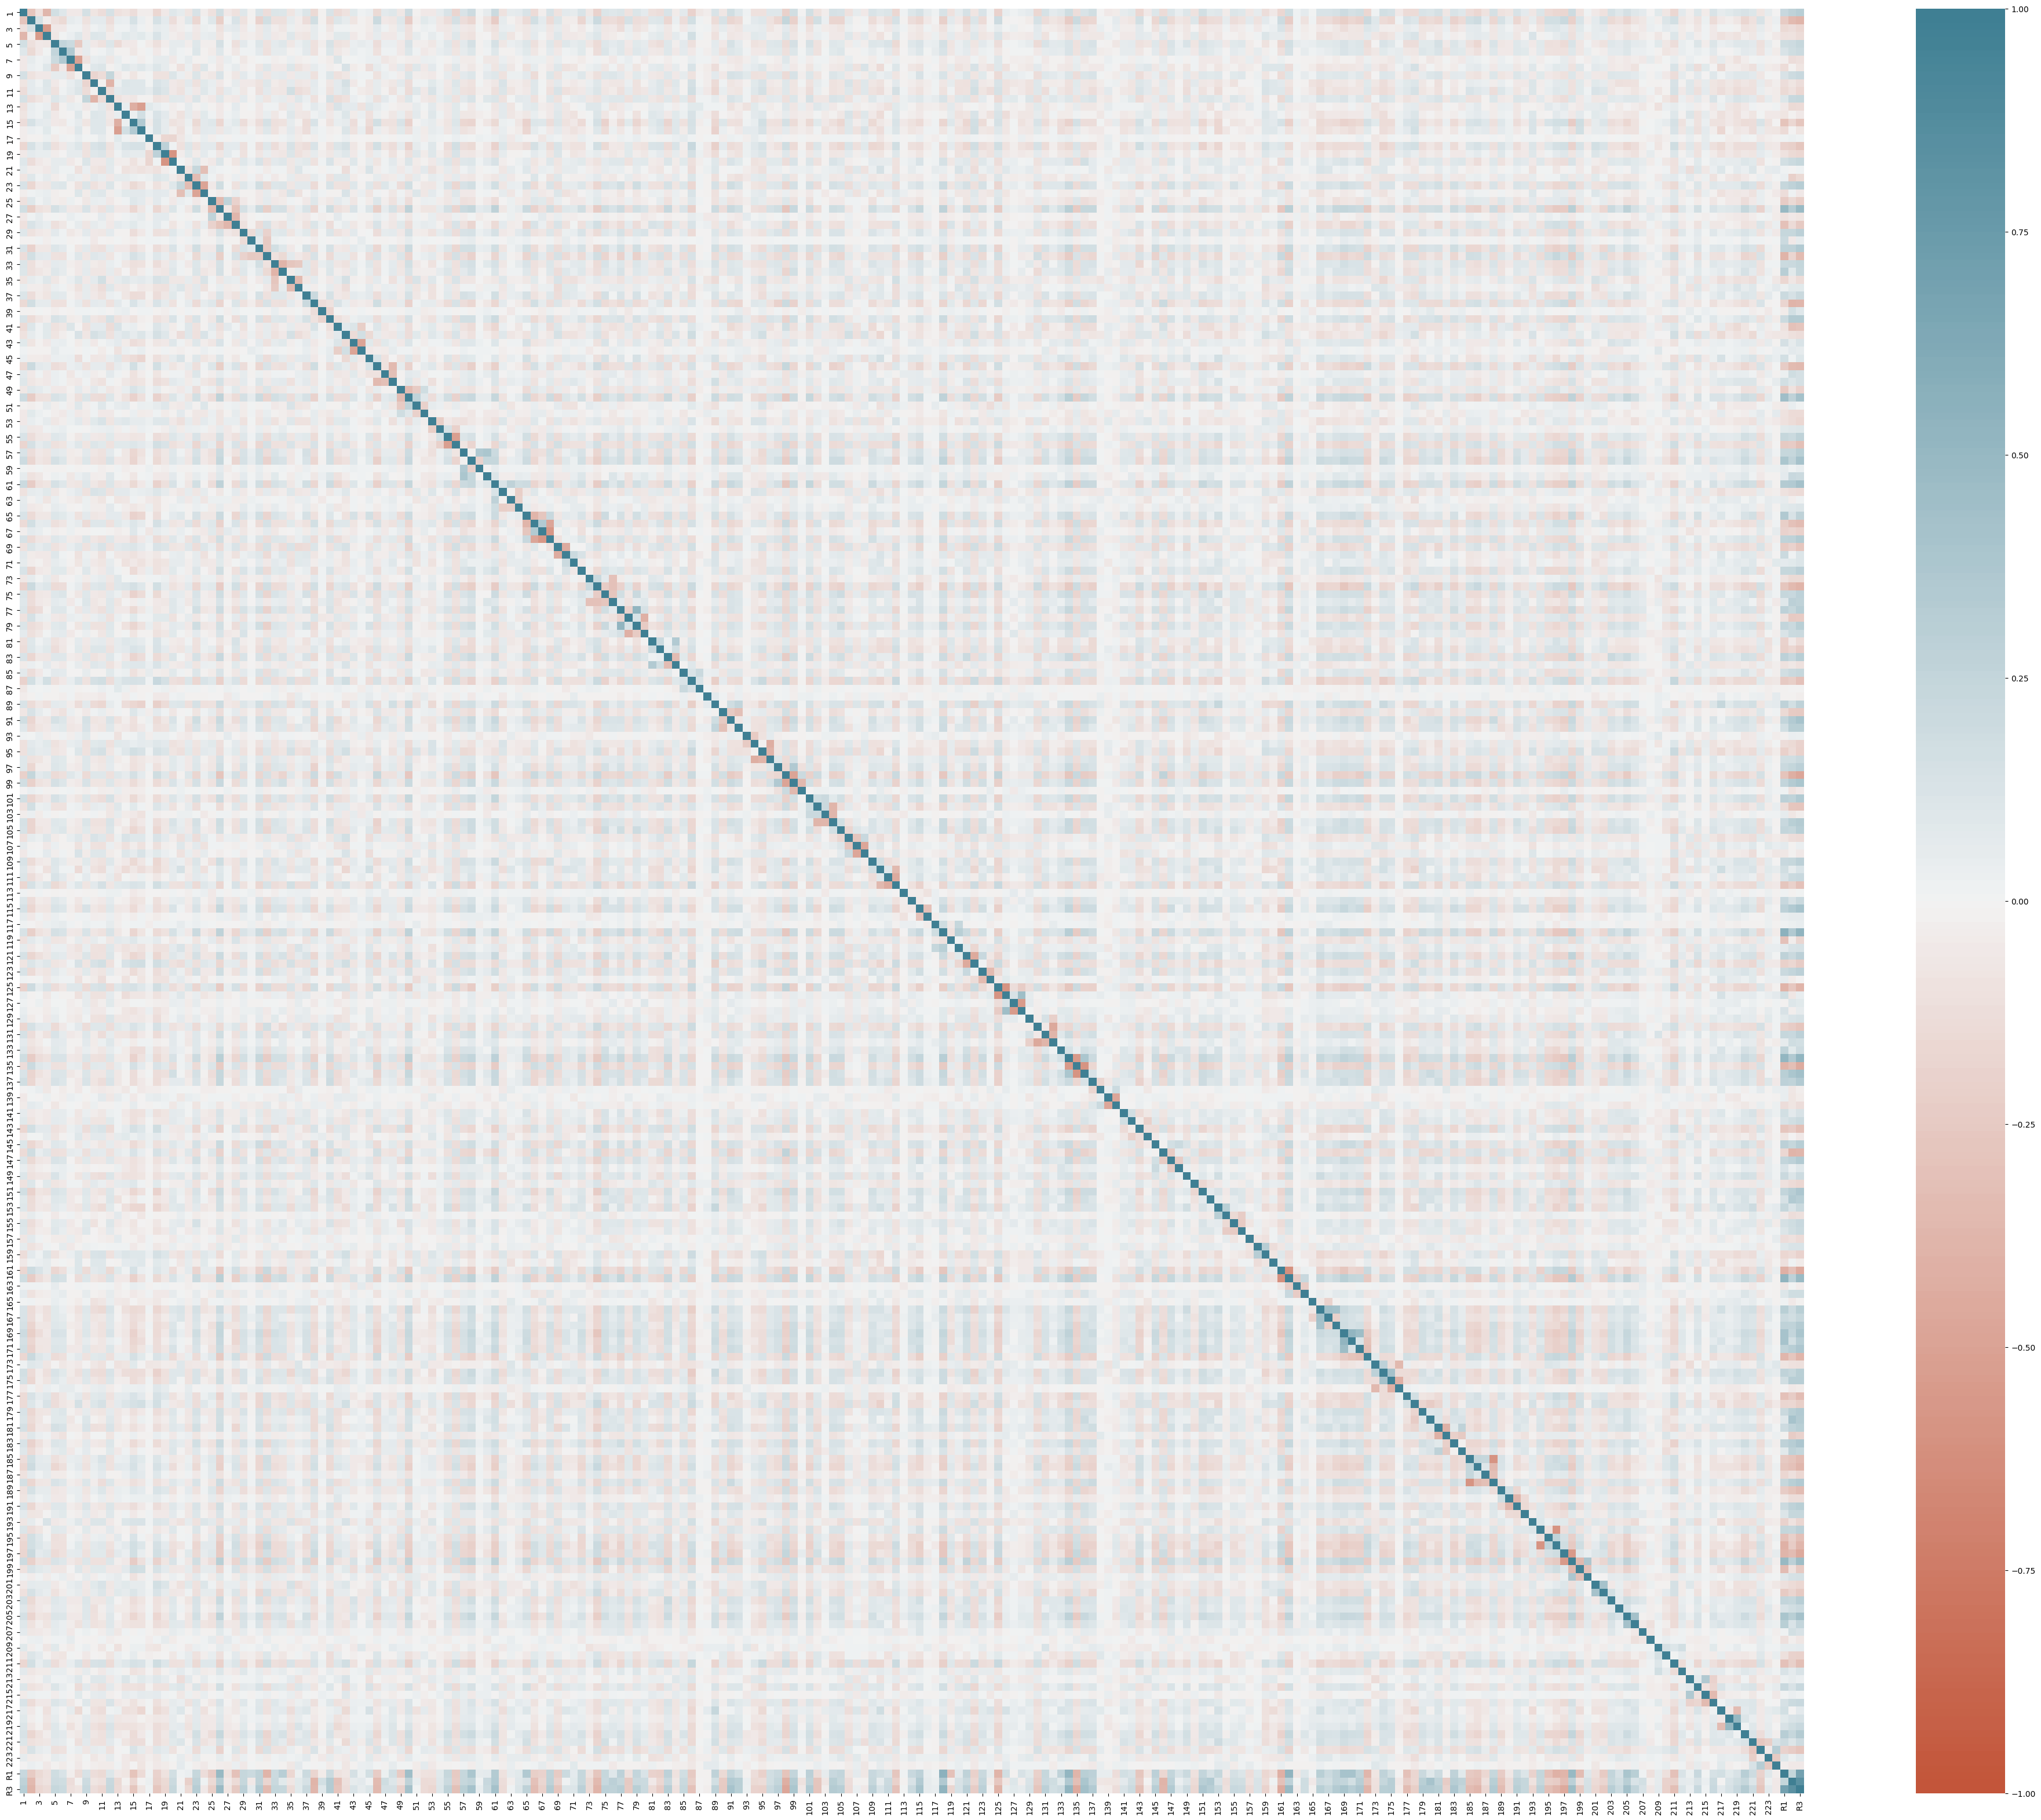

In [25]:
corr = df_train.corr()

plt.figure(figsize=(50, 40))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    annot = False,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

## X/y Test

In [26]:
df_test_out = df_test.copy()
df_test_out = renombrar_columnas(df_test_out)
df_test_out = eliminar_registros_duplicados(df_test_out)
df_test_out, _ = escalar_datos(df_test_out, train_scaler_dict)

In [27]:
X_test, y_test = separar_Xy(df_test_out, columnas_target=columnas_target)
# X_test, y_test = separar_Xy(df_test_out, cant_var_target)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4400, 224), (4400, 3), (1100, 224), (1100, 3))

# MLP Regressor

### Optimizador de Hiperparámetros

In [114]:
# Definir el modelo
mlp = MLPRegressor(max_iter=1000)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (50, 50), (50, 30, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    # 'alpha': [0.0001, 0.001, 0.01],
    # 'learning_rate': ['constant', 'adaptive'],
    # 'learning_rate_init': [0.001, 0.01],
    'early_stopping': [True]
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (50, 30, 10), 'solver': 'adam'}


### Modelo MLP

In [134]:
# Crear y entrenar el MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 10 ), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

Error Cuadrático Medio: 0.0070003803095988505


In [135]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
2808,130,11,105,6,260,-5,45,6,330,-5,...,30,7,45,12,12.95,6.28,17.43,10.510785,6.646902,19.778436
5685,70,11,25,25,260,-5,45,6,0,3,...,30,13,110,6,2.12,5.01,11.23,3.611332,5.938836,13.055052
4402,70,-1,25,25,300,5,25,25,330,-5,...,30,7,45,12,16.40,7.65,18.54,15.696051,6.475648,21.403392
655,70,7,65,25,250,3,65,25,0,13,...,30,13,110,6,3.07,5.68,11.04,3.184962,5.218722,11.627481
4212,120,11,25,6,300,7,90,6,0,13,...,90,-3,65,12,19.51,6.25,20.93,12.950207,6.493057,20.560649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,130,-7,25,12,300,11,105,6,0,13,...,30,-3,105,6,12.30,7.04,17.30,11.568230,7.523514,21.251912
4173,70,-1,25,25,270,11,65,25,330,-5,...,70,15,110,25,17.89,6.35,21.08,14.157232,6.553454,21.031837
3170,80,-5,45,6,260,-3,65,12,30,13,...,60,5,105,6,17.75,8.55,22.05,14.099999,7.251651,21.752256
3045,80,-5,110,6,250,3,65,25,30,-7,...,70,-1,65,12,11.07,7.77,17.82,9.985801,7.479208,19.579212


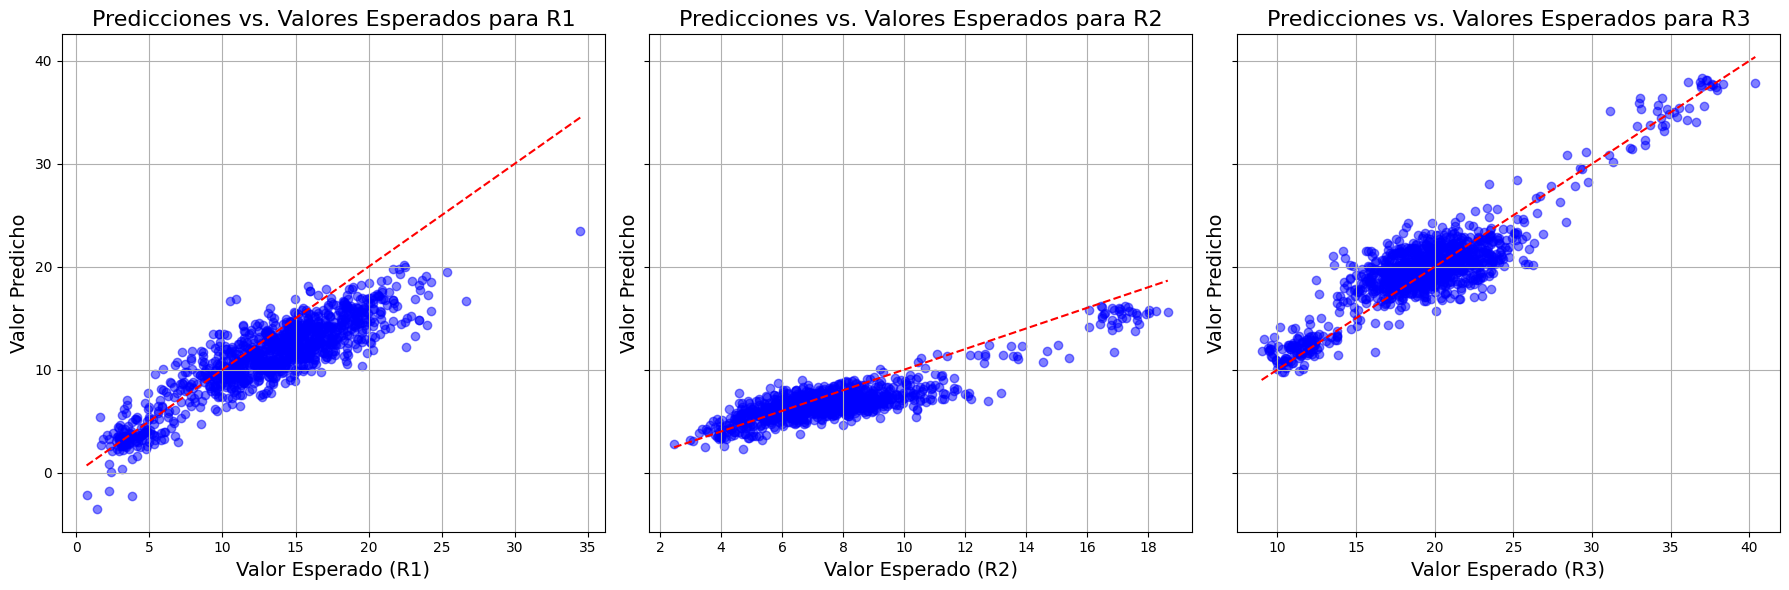

In [136]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# NN Densa

### Modelo

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 256)               57600     
                                                                 
 dropout_46 (Dropout)        (None, 256)               0         
                                                                 
 dense_61 (Dense)            (None, 256)               65792     
                                                                 
 dropout_47 (Dropout)        (None, 256)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)              

In [ ]:
# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=20,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

# Definir el número de características (p) para calcular R2 ajustado
p = X_train.shape[1]

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)
print("-------------------------\nFin del Entrenamiento")

Inicio del Entrenamiento
-------------------------
Epoch 1/100
39/39 [==============================] - 2s 14ms/step - loss: 0.0666 - mean_squared_error: 0.0666 - mae: 0.2001 - val_loss: 0.0408 - val_mean_squared_error: 0.0408 - val_mae: 0.1610 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - mae: 0.1549 - val_loss: 0.0292 - val_mean_squared_error: 0.0292 - val_mae: 0.1333 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0324 - mean_squared_error: 0.0324 - mae: 0.1422 - val_loss: 0.0306 - val_mean_squared_error: 0.0306 - val_mae: 0.1369 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - mae: 0.1346 - val_loss: 0.0265 - val_mean_squared_error: 0.0265 - val_mae: 0.1269 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - mae: 0.1314 

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

25/25 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[0.33731356, 0.46531972, 0.46633646],
       [0.34854117, 0.21719491, 0.24294692],
       [0.39085865, 0.20601195, 0.2566538 ],
       ...,
       [0.47634286, 0.4727034 , 0.5615907 ],
       [0.39544094, 0.26451662, 0.31624416],
       [0.4689842 , 0.30961558, 0.41431132]], dtype=float32)

In [ ]:
y_pred.shape

(770, 3)

## Métricas

In [ ]:
def r2_ajustado(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    r2_aj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return r2_aj

In [ ]:
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train
y_test_1 = np.array(y_test.iloc[:, 0])[:, np.newaxis]
y_pred_1 = np.array(y_pred[:, 0])[:, np.newaxis]
y_test_2 = np.array(y_test.iloc[:, 1])[:, np.newaxis]
y_pred_2 = np.array(y_pred[:, 1])[:, np.newaxis]
y_test_3 = np.array(y_test.iloc[:, 2])[:, np.newaxis]
y_pred_3 = np.array(y_pred[:, 2])[:, np.newaxis]

In [ ]:
n, p

(770, 224)

In [ ]:
y_test_1.shape, y_pred_1.shape, y_test_2.shape, y_pred_2.shape, y_test_3.shape, y_pred_3.shape

((770, 1), (770, 1), (770, 1), (770, 1), (770, 1), (770, 1))

-------------------------
Métricas
Métricas para 225
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.10
R2 Score: 0.47
R2 Ajustado: 0.25

Métricas para 226
Mean Squared Error (MSE): 0.03
Mean Absolute Error (MAE): 0.13
R2 Score: -0.32
R2 Ajustado: -0.86

Métricas para 227
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.12
R2 Score: 0.16
R2 Ajustado: -0.19



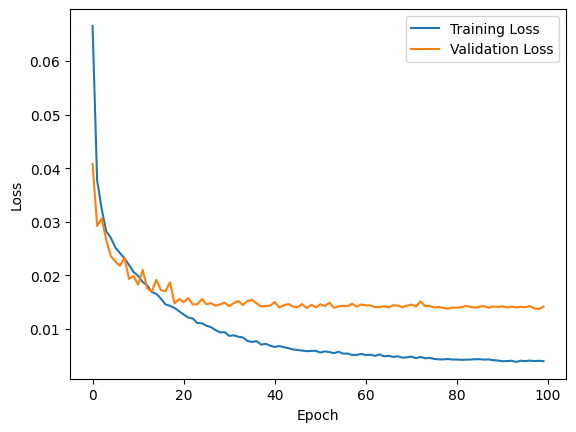

In [ ]:
# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train

for i in range(y_test.shape[1]):
    y_test_i = np.array(y_test.iloc[:, i])[:, np.newaxis]  # Obtener las observaciones para la variable de salida i
    y_pred_i = np.array(y_pred[:, i])[:, np.newaxis]  # Obtener las predicciones para la variable de salida i

    r2_aj = r2_ajustado(y_test_i, y_pred_i, n, p)

    # Métricas de regresión para la variable de salida i
    mse = mean_squared_error(y_test_i, y_pred_i)
    mae = mean_absolute_error(y_test_i, y_pred_i)
    r2 = r2_score(y_test_i, y_pred_i)

    print(f"Métricas para {i + 225}")
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Mean Absolute Error (MAE): {:.2f}".format(mae))
    print("R2 Score: {:.2f}".format(r2))
    print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predicciones

In [ ]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,225,226,227
3306,80,-5,110,6,250,3,65,25,0,5,...,20,105,6,80,1,15,12,10.69,9.93,22.17
597,130,3,110,6,280,-5,25,6,0,3,...,6,45,6,80,3,90,12,12.14,10.15,21.95
1416,80,-5,45,6,280,-5,45,25,330,-5,...,6,25,12,30,13,110,6,8.75,5.96,14.89
946,130,11,105,6,260,-3,65,12,330,13,...,4,90,6,30,7,45,12,18.51,5.33,18.58
2512,90,5,45,12,280,11,15,12,350,-5,...,20,105,6,70,-1,65,12,16.54,5.65,16.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,110,-5,90,6,260,-5,45,6,330,13,...,22,65,12,70,5,15,25,15.59,8.09,22.46
3238,110,-5,90,6,260,3,65,12,10,7,...,20,110,25,60,13,25,25,17.23,6.05,19.70
4002,100,5,15,25,260,3,65,12,350,13,...,20,110,25,30,13,110,6,12.92,7.01,16.46
3781,120,11,25,6,270,3,105,6,0,3,...,20,105,6,80,1,15,12,17.00,6.30,19.13


In [ ]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['225', '226', '227']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,225,226,227,P_225,P_226,P_227
3306,80,-5,110,6,250,3,65,25,0,5,...,80,1,15,12,10.69,9.93,22.17,10.347018,7.729729,19.668890
597,130,3,110,6,280,-5,25,6,0,3,...,80,3,90,12,12.14,10.15,21.95,10.601885,5.223669,16.210817
1416,80,-5,45,6,280,-5,45,25,330,-5,...,30,13,110,6,8.75,5.96,14.89,11.562491,5.110721,16.423000
946,130,11,105,6,260,-3,65,12,330,13,...,30,7,45,12,18.51,5.33,18.58,14.923910,5.315762,18.235638
2512,90,5,45,12,280,11,15,12,350,-5,...,70,-1,65,12,16.54,5.65,16.74,16.266357,5.578329,19.304070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,110,-5,90,6,260,-5,45,6,330,13,...,70,5,15,25,15.59,8.09,22.46,13.681234,6.179125,19.060314
3238,110,-5,90,6,260,3,65,12,10,7,...,60,13,25,25,17.23,6.05,19.70,15.209826,4.939180,17.773949
4002,100,5,15,25,260,3,65,12,350,13,...,30,13,110,6,12.92,7.01,16.46,13.502983,7.804305,21.143423
3781,120,11,25,6,270,3,105,6,0,3,...,80,1,15,12,17.00,6.30,19.13,11.666510,5.701618,17.345459


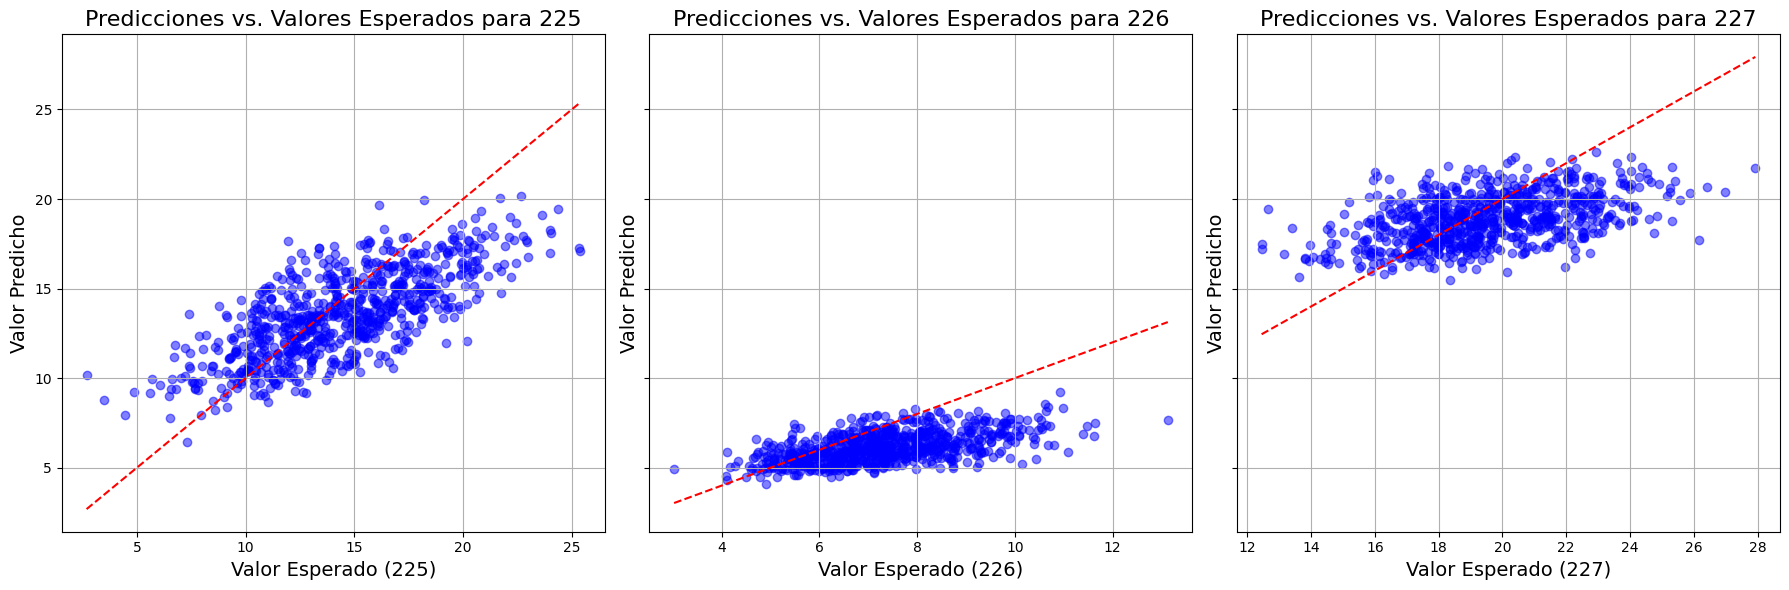

In [ ]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['225', '226', '227']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Prueba de Modelos

In [ ]:
# Definir la función objetivo para la optimización inversa
def objective_function(X):
    X = np.array(X).reshape(1, -1)
    predictions = model.predict(X)
    return -np.sum(predictions)  # Queremos maximizar la salida, así que minimizamos el negativo

### #1

-------------------------
Fin del Entrenamiento
25/25 [==============================] - 0s 2ms/step
-------------------------
Métricas
Métricas para 281
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.10
R2 Score: 0.46
R2 Ajustado: 0.24

Métricas para 282
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.11
R2 Score: -0.01
R2 Ajustado: -0.43

Métricas para 283
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.12
R2 Score: 0.17
R2 Ajustado: -0.17

-------------------------
Curva de Aprendizaje


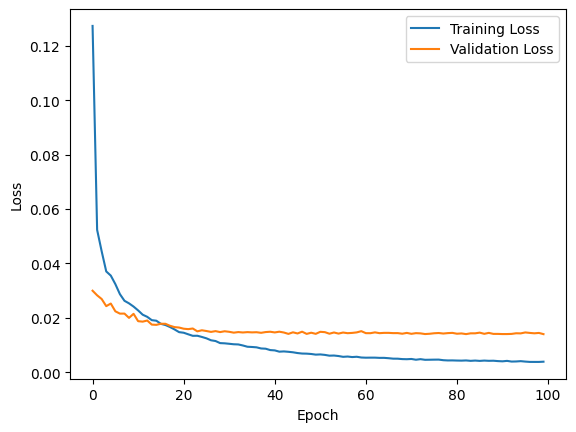

-------------------------
Predicciones


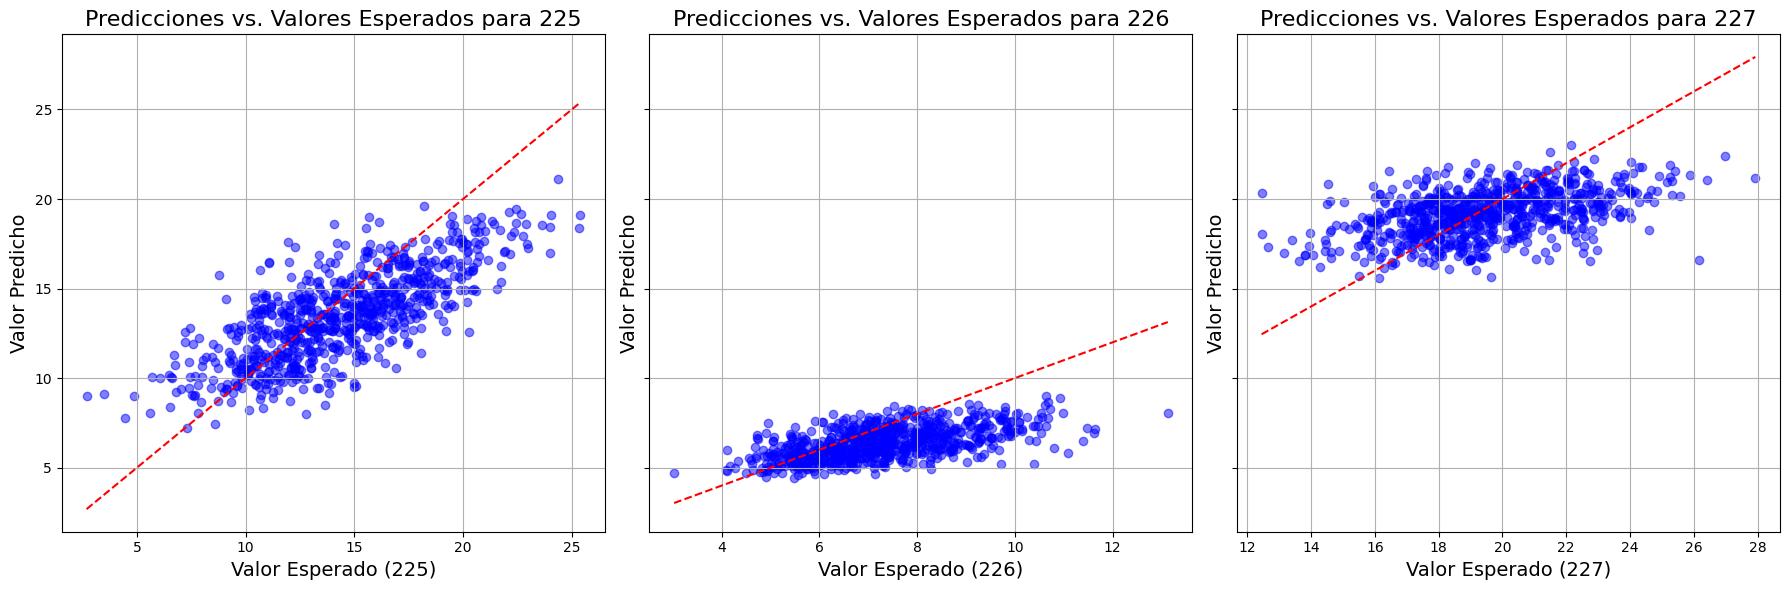

In [ ]:
# Arquitectura
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train

for i in range(y_test.shape[1]):
    y_test_i = np.array(y_test.iloc[:, i])[:, np.newaxis]  # Obtener las observaciones para la variable de salida i
    y_pred_i = np.array(y_pred[:, i])[:, np.newaxis]  # Obtener las predicciones para la variable de salida i

    r2_aj = r2_ajustado(y_test_i, y_pred_i, n, p)

    # Métricas de regresión para la variable de salida i
    mse = mean_squared_error(y_test_i, y_pred_i)
    mae = mean_absolute_error(y_test_i, y_pred_i)
    r2 = r2_score(y_test_i, y_pred_i)

    print(f"Métricas para {i + 281}")
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Mean Absolute Error (MAE): {:.2f}".format(mae))
    print("R2 Score: {:.2f}".format(r2))
    print("R2 Ajustado: {:.2f}\n".format(r2_aj))



print("-------------------------\nCurva de Aprendizaje")
# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['225', '226', '227']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Inicializar con un valor promedio para cada característica
X_initial = np.mean(X_train, axis=0)

# Ejecutar la optimización
result = minimize(objective_function, X_initial, method='L-BFGS-B', bounds=[(0, 1)] * X_train.shape[1])

# Obtener las entradas óptimas
X_optimal = result.x

# Revertir la normalización de las características
X_optimal_original = np.zeros_like(X_optimal)
for i, column in enumerate(X_train.columns):
    X_optimal_original[i] = train_scaler_dict[column].inverse_transform(X_optimal[i].reshape(1, -1))[0, 0]

# Ajustar las opciones de impresión de NumPy para evitar notación científica
np.set_printoptions(suppress=True, precision=8)

clear_output(wait=True)
print("Valores óptimos de las características (normalizados):", X_optimal)
print("Valores óptimos de las características (originales):", X_optimal_original)

Valores óptimos de las características (normalizados): [0.42938312 0.50029221 0.45661312 0.37366712 0.45922078 0.54108947
 0.50628845 0.4343985  0.30453618 0.61448052 0.50637389 0.19348941
 0.82       0.50211039 0.50292208 0.38197198 0.50665584 0.47418831
 0.55750171 0.3780417  0.58571429 0.47532468 0.41831852 0.52105263
 0.46931818 0.44574315 0.29727633 0.39449761 0.40320037 0.43681818
 0.38602187 0.50745044 0.40660173 0.44581169 0.43172269 0.36522556
 0.55681818 0.5498557  0.53186945 0.4869959  0.74603896 0.51688312
 0.51344839 0.27347915 0.73923933 0.40270563 0.49249829 0.49911141
 0.50167749 0.49149351 0.32992139 0.52120643 0.47348485 0.57269481
 0.52445318 0.50519481 0.42900433 0.48694805 0.56153452 0.32411141
 0.40784632 0.48097403 0.40905673 0.58204033 0.70289425 0.37915584
 0.48086124 0.36785714 0.59361472 0.50126623 0.38051948 0.55174299
 0.64766234 0.45217532 0.55861345 0.36114149 0.49237013 0.56084416
 0.5066473  0.41555024 0.64324675 0.46298701 0.50119617 0.40452837
 0.5161

### #2

-------------------------
Fin del Entrenamiento
25/25 [==============================] - 0s 6ms/step
-------------------------
Métricas
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.11
R2 Score: 0.13
R2 Ajustado: 0.04



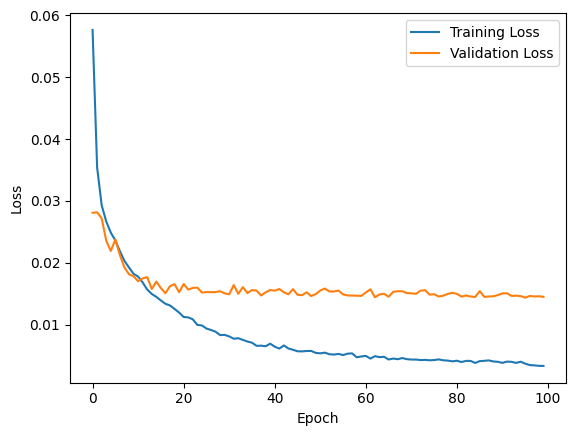

-------------------------
Predicciones


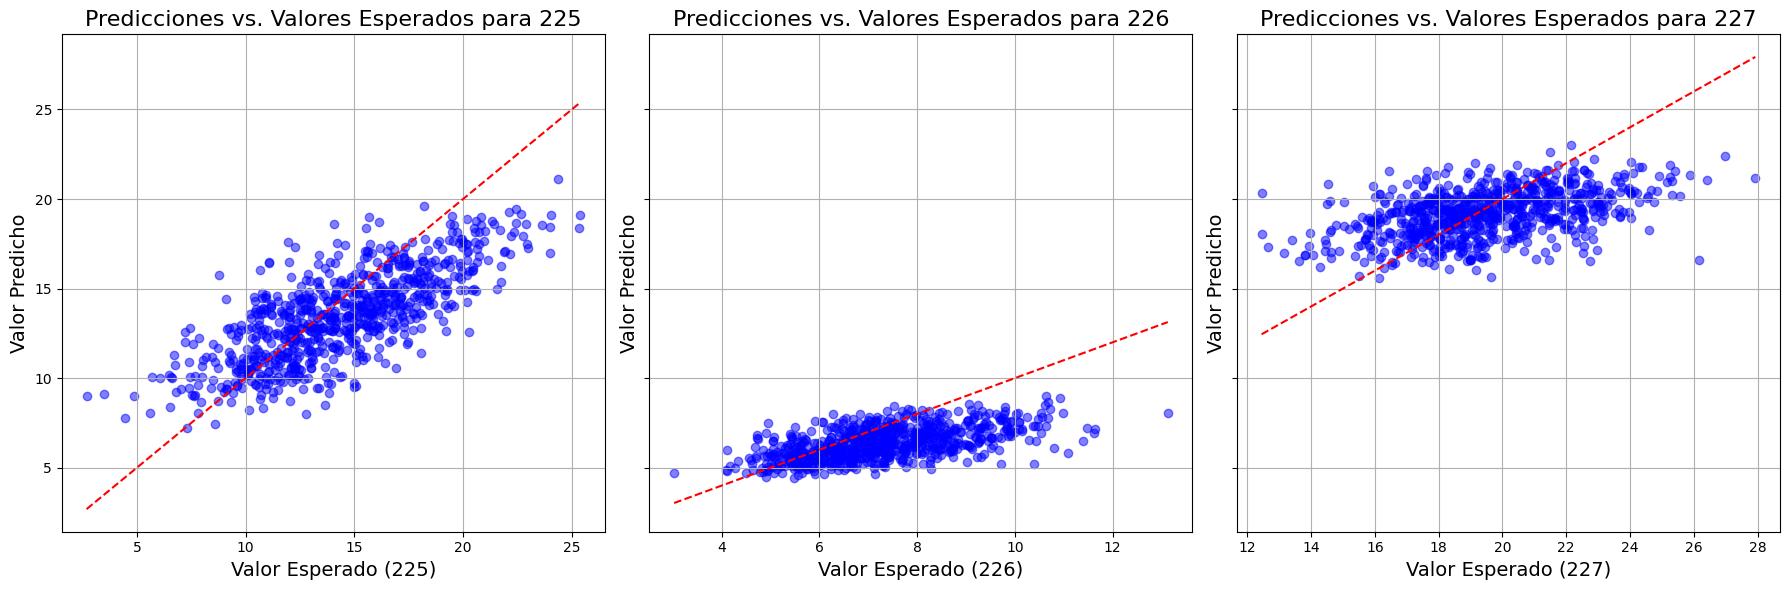

In [ ]:
# Arquitectura
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(512, activation='relu'), Dropout(0.2),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0] * y_test.shape[1]  # número total de observaciones en y_test
p = X_train.shape[1] # número de características en X_train
r2_aj = r2_ajustado(y_test, y_pred, n, p)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))
print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['225', '226', '227']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### #3

-------------------------
Fin del Entrenamiento
25/25 [==============================] - 0s 2ms/step
-------------------------
Métricas
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.11
R2 Score: 0.13
R2 Ajustado: -0.22



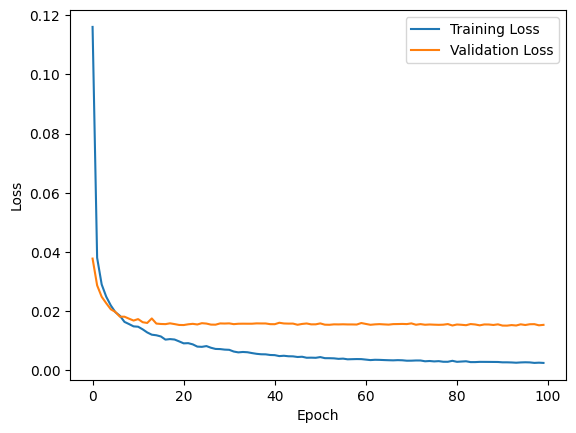

-------------------------
Predicciones


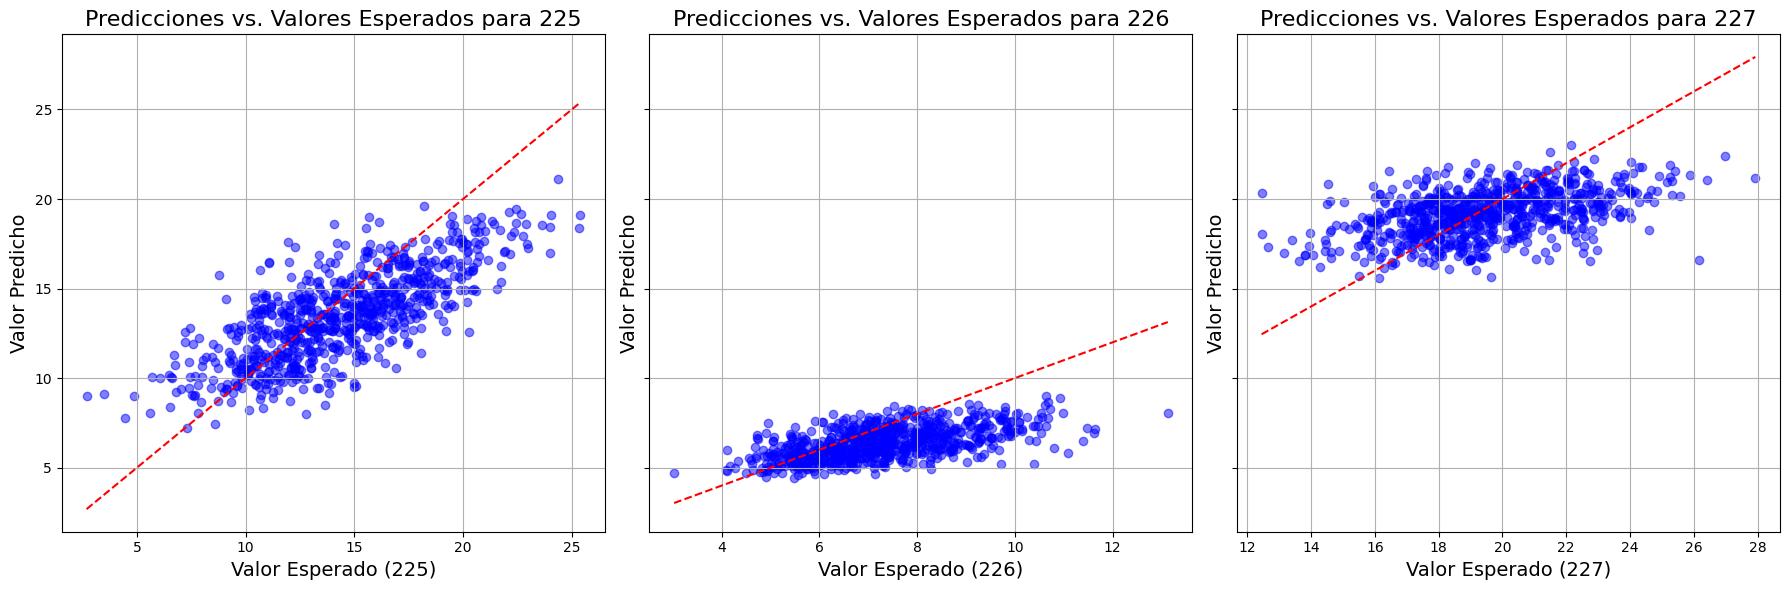

In [ ]:
# Arquitectura
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

# Definir el número de características (p) para calcular R2 ajustado
p = X_train.shape[1]

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = len(y_test)
r2_aj = r2_ajustado(y_test, y_pred, n, p)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))
print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['225', '226', '227']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# CNN

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [31]:
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3))  # Output layer for 3 variables
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Asegúrate de dar forma a tus datos de entrada de manera adecuada
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = build_cnn_model(X_train_reshaped.shape[1])
model.summary()

AttributeError: 'DataFrame' object has no attribute 'reshape'

# RandomForest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [34]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
2808,130,11,105,6,260,-5,45,6,330,-5,...,30,7,45,12,12.95,6.28,17.43,12.733509,6.530089,19.798231
5685,70,11,25,25,260,-5,45,6,0,3,...,30,13,110,6,2.12,5.01,11.23,3.117590,5.385172,12.858936
4402,70,-1,25,25,300,5,25,25,330,-5,...,30,7,45,12,16.40,7.65,18.54,10.321380,6.836647,19.157253
655,70,7,65,25,250,3,65,25,0,13,...,30,13,110,6,3.07,5.68,11.04,2.792266,5.471192,11.726535
4212,120,11,25,6,300,7,90,6,0,13,...,90,-3,65,12,19.51,6.25,20.93,11.442887,6.404791,18.976288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,130,-7,25,12,300,11,105,6,0,13,...,30,-3,105,6,12.30,7.04,17.30,11.549784,7.262880,20.464438
4173,70,-1,25,25,270,11,65,25,330,-5,...,70,15,110,25,17.89,6.35,21.08,13.237877,6.982413,20.785737
3170,80,-5,45,6,260,-3,65,12,30,13,...,60,5,105,6,17.75,8.55,22.05,14.085523,8.695916,24.292368
3045,80,-5,110,6,250,3,65,25,30,-7,...,70,-1,65,12,11.07,7.77,17.82,13.376214,6.996058,20.830117


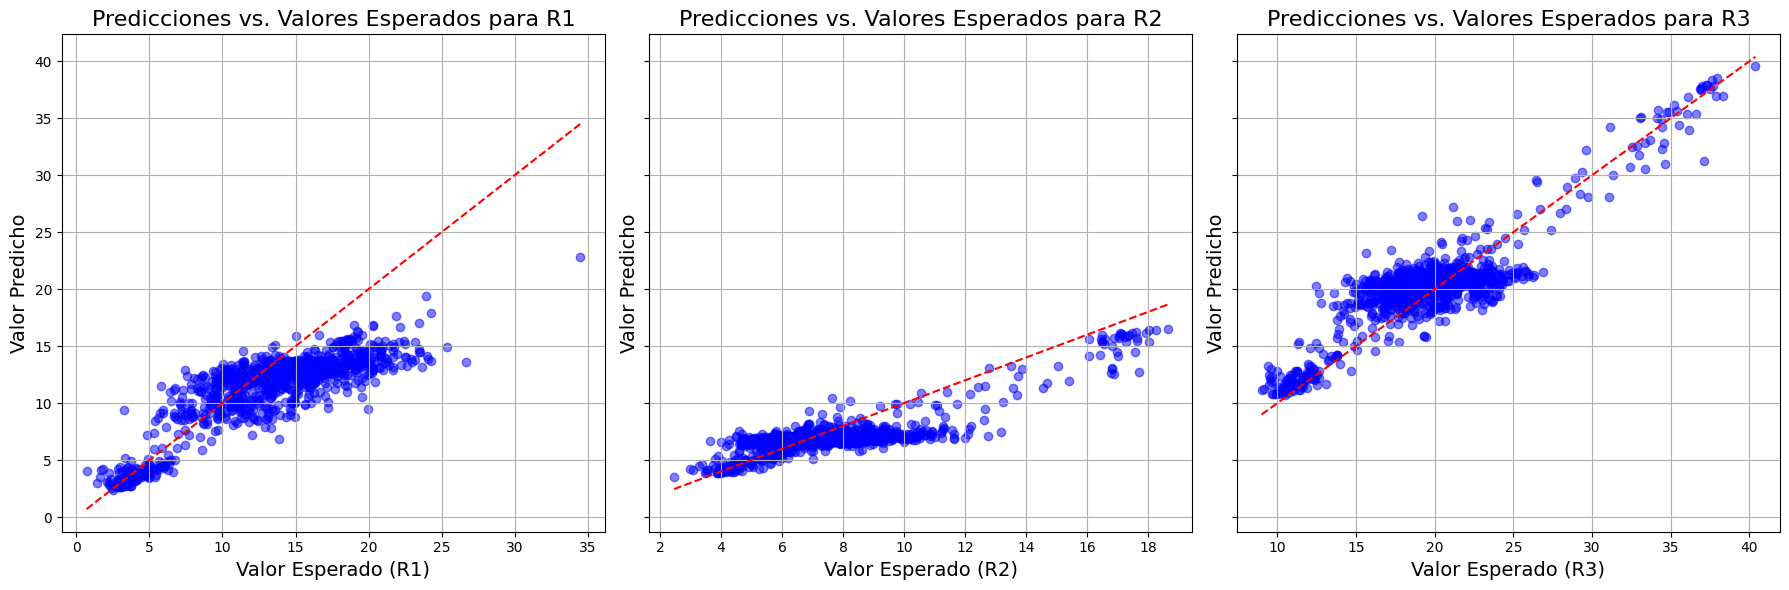

In [35]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Gradient Boosting

In [36]:
import xgboost as xgb

In [40]:
# Preparar los conjuntos de entrenamiento y validación
eval_set = [(X_train, y_train), (X_test, y_test)]

In [37]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [38]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,R1,R2,R3,P_R1,P_R2,P_R3
2808,130,11,105,6,260,-5,45,6,330,-5,...,30,7,45,12,12.95,6.28,17.43,11.885570,6.712664,20.318043
5685,70,11,25,25,260,-5,45,6,0,3,...,30,13,110,6,2.12,5.01,11.23,2.253789,5.238492,12.798746
4402,70,-1,25,25,300,5,25,25,330,-5,...,30,7,45,12,16.40,7.65,18.54,12.370286,6.857119,18.737518
655,70,7,65,25,250,3,65,25,0,13,...,30,13,110,6,3.07,5.68,11.04,3.042186,5.480514,11.941083
4212,120,11,25,6,300,7,90,6,0,13,...,90,-3,65,12,19.51,6.25,20.93,12.951770,5.990257,19.949169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,130,-7,25,12,300,11,105,6,0,13,...,30,-3,105,6,12.30,7.04,17.30,12.215123,7.417573,20.955229
4173,70,-1,25,25,270,11,65,25,330,-5,...,70,15,110,25,17.89,6.35,21.08,14.134130,6.886594,21.228334
3170,80,-5,45,6,260,-3,65,12,30,13,...,60,5,105,6,17.75,8.55,22.05,12.062970,7.712877,21.767542
3045,80,-5,110,6,250,3,65,25,30,-7,...,70,-1,65,12,11.07,7.77,17.82,12.885353,7.429045,20.677765


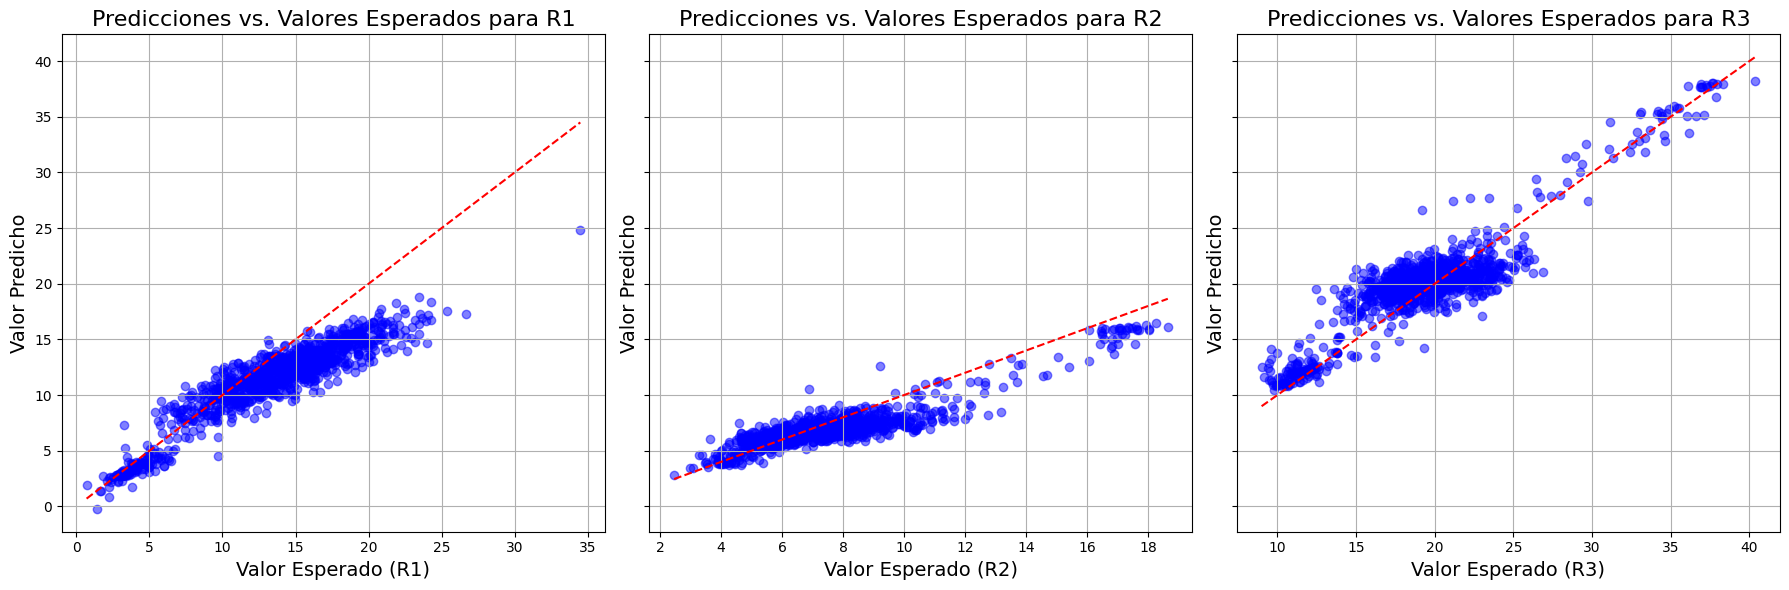

In [39]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Optimización Inversa

In [ ]:
# Función objetivo para la optimización inversa
def funcion_objetivo(inputs):
    # Reescalar las entradas a sus valores originales
    inputs_rescaled = train_scaler_dict['225'].inverse_transform(inputs.reshape(1, -1))

    # Hacer predicciones con el modelo
    y_pred = model.predict(inputs_rescaled)

    # Calcular la suma de las salidas de las variables 225, 226 y 227
    suma_salidas = np.sum(y_pred[:, [0, 1, 2]])

    # Devolver el negativo de la suma para que minimice la función objetivo
    return -suma_salidas

# Definir límites para las entradas a las 224 características
limites_entradas = [(0, 1)] * 224  # Suponemos que las entradas están normalizadas entre 0 y 1

# Realizar la optimización utilizando algoritmo genético (differential evolution)
resultado_optimizacion = differential_evolution(funcion_objetivo, bounds=limites_entradas, strategy='best1bin', maxiter=5, popsize=10)

# Las entradas óptimas que maximizan la función objetivo
entradas_optimas = resultado_optimizacion.x

# Imprimir las entradas óptimas
print("Entradas óptimas:")
print(entradas_optimas)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
1/1 [==============================] - 0s 28ms/step
Entradas óptimas:
[0.52449979 0.33772492 0.50815152 0.2215722  0.92174798 0.19873471
 0.05690585 0.11448514 0.20685752 0.01920565 0.87377896 0.06012395
 0.71422703 0.3992615  0.00922588 0.67647463 0.17786569 0.22782305
 0.97538335 0.78782594 0.18850402 0.78145292 0.00407121 0.20741353
 0.02405476 0.31962992 0.27850952 0.73008642 0.93525057 0.32303722
 0.92539523 0.24487673 0.76428519 0.75617208 0.08994161 0.09645166
 0.84857261 0.11528808 0.43685108 0.83329414 0.93967804 0.43270792
 0.19846564 0.54056435 0.70957447 0.36284472 0.50901307 0.46005592
 0.16833399 0.24983984 0.5548747  0.02310493 0.31755188 0.40379616
 0.01354938 0.1809766  0.71113933 0.23671044 0.89727675 0.30214096
 0.777686   0.26429777 0.25292484 0.2951924  0.43087239 0.84658891
 0.06012309 0.44250772 0.4891263  0.45127731 0.44951791 0.81574709
 0.09801412 0.00302613 0.01058154 0.05525888 0.27069275 0.4

In [ ]:
# Reescalar las entradas óptimas a su forma original
entradas_optimas_rescaled = train_scaler_dict['225'].inverse_transform(entradas_optimas.reshape(1, -1))

# Imprimir las entradas óptimas reescaladas
print("Entradas óptimas reescaladas:")
print(entradas_optimas_rescaled)

Entradas óptimas reescaladas:
[[14.59614529 10.35635559 14.2250395   7.71968901 23.61367907  7.201278
   3.98176282  5.28881276  7.38566572  3.12596828 22.5247825   4.05481364
  18.90295354 11.75323599  2.89942754 18.04597404  6.7275512   7.86158315
  24.83120199 20.57364886  6.96904135 20.4289814   2.78241654  7.39828716
   3.23604311  9.94559913  9.01216606 19.26296182 23.92018799 10.02294486
  23.69647178  8.24870176 20.03927379 19.85510623  4.73167458  4.87945265
  21.95259817  5.30703948 12.60651948 21.60577705 24.02069152 12.51246988
   7.19517012 14.96081082 18.79734042 10.92657518 14.24459662 13.13326942
   6.51118167  8.36136431 15.28565561  3.21448194  9.89842765 11.85617293
   2.99757084  6.79816881 18.8328627   8.06332706 23.05818222  9.54859973
  20.3434723   8.68955947  8.43139381  9.39086757 12.4708033  21.90756816
   4.05479407 12.73492532 13.79316696 12.93399502 12.89405665 21.20745893
   4.91492058  2.7586932   2.93020103  3.94437654  8.83472545 12.64216411
   7.78836

# Guardado de inputs

In [ ]:
entradas_optimas_rescaled.shape

(1, 224)

In [ ]:
def escribir_en_archivo(entradas):
  # Verificar si el archivo existe
  if not os.path.exists('resultados.txt'):
    # Crear el archivo
    with open('resultados.txt', 'w') as f:
      f.write('')

  # Abrir el archivo en modo append
  with open('resultados.txt', 'a') as f:
    # Escribir las entradas óptimas en el archivo
    np.savetxt(f, entradas, delimiter=',')

In [ ]:
escribir_en_archivo(entradas_optimas_rescaled)

# Import / Export de Modelos

TensorFlow

In [ ]:
model.save('mlp_model')

In [ ]:
loaded_model = tf.keras.models.load_model('mlp_model')

Pickle

In [ ]:
mlp.save('mlp_model.h5')
with open('mlp_model_pickle.pkl', 'wb') as file:
    pickle.dump('mlp_model.h5', file)

In [ ]:
with open('mlp_model_pickle.pkl', 'rb') as file:
    model_file = pickle.load(file)
loaded_model = tf.keras.models.load_model(model_file)

Joblib

In [144]:
joblib.dump(mlp, 'mlp_regressor_model.pkl')

['mlp_regressor_model.pkl']

In [ ]:
mlp_loaded = joblib.load('mlp_regressor_model.pkl')